In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np





In [2]:
from ising import run_multi_core, set_input
from glob import glob

def dict_to_string(dict):
    t_name=""
    for key, val in dict.items():
        t_name+=str(key)+":"+str(val)+" "
    return t_name


def getRun(params = {}, use_cached=True):
    inp = set_input("")
    for key,value in params.items():
        inp[key]=value


    inpstring = dict_to_string(inp)

    allRuns = glob("data/*")
    cached=False
    for run in allRuns:
        if(inpstring in run and use_cached):
            print("Using cached run")
            cached=True

    if not cached:
        run_multi_core(inp)

    allRuns = glob("data/*")
    
    allRuns = [run for run in allRuns if inpstring in run]

    SCfile = [run for run in allRuns if "SC" in run]
    EMfile = [run for run in allRuns if "EM" in run]

    print(allRuns)
    print(SCfile[0])

    SC = pd.read_csv(SCfile[0], skiprows=[0,1,2])
    EM = pd.read_csv(EMfile[0], skiprows=[0,1,2])

    return SC, EM

def run(params = {}):
    inp = set_input("")
    for key,value in params.items():
        inp[key]=value


    inpstring = dict_to_string(inp)

    data = run_multi_core(inp)


In [28]:

data = run({"t_step":0.01, "flip_perc":0.1, "N":100, "t_min":1.2, "t_max":3.2, "n_burnin":25000, "n_steps":50000, "use_gaussian":True})


2D Ising Model Simulation; multi-cores

Starting temp 1.002
Starting temp 1.295
Starting temp 1.26
Starting temp 1.49
Starting temp 1.507
Starting temp 1.516
Starting temp 1.492
Finished Temp 1.49
Starting temp 1.527
Finished Temp 1.26
Finished Temp 1.002
Starting temp 1.55
Starting temp 1.583
Finished Temp 1.516
Finished Temp 1.295
Starting temp 1.623
Starting temp 1.603
Finished Temp 1.507
Starting temp 1.624
Finished Temp 1.492
Starting temp 1.653
Finished Temp 1.583
Starting temp 1.669
Finished Temp 1.527
Starting temp 1.682
Finished Temp 1.603
Starting temp 1.684
Finished Temp 1.55
Starting temp 1.693
Finished Temp 1.623
Starting temp 1.693
Finished Temp 1.624
Starting temp 1.699
Finished Temp 1.653
Starting temp 1.704
Finished Temp 1.669
Starting temp 1.706
Finished Temp 1.684
Starting temp 1.709
Finished Temp 1.682
Starting temp 1.718
Finished Temp 1.693
Starting temp 1.722
Finished Temp 1.693
Starting temp 1.752
Finished Temp 1.699
Starting temp 1.768
Finished Temp 1.704
Start

[ 2.24998377e+00  5.60914343e-05 -1.00004073e+00] [ 2.25704818e+00  2.95853583e-05 -9.99982882e-01]


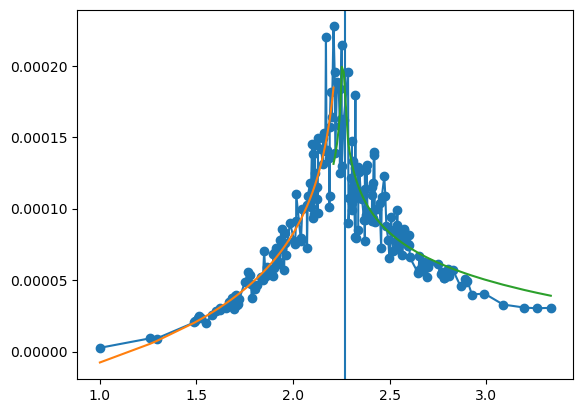

In [34]:

SC = pd.read_csv("data/1.20T3.20_SC_v4.csv", skiprows=[0,1,2])
EM = pd.read_csv("data/1.20T3.20_EM_v4.csv", skiprows=[0,1,2])

def spike(x,Tc,a,c):
    return np.abs((x-Tc)/Tc)**-a+c

T=EM["Temp"]
cv=1/T**2*(EM["E_std"]**2)

plt.plot(T,cv,"o-")
plt.axvline(2.269)

peakI=np.argmax(cv)

leftT=T[0:peakI+1]
rightT=T[peakI:]

lpopt, lpcov = curve_fit(spike,leftT,cv[0:peakI+1], p0=(2.26,0,0))
rpopt, rpcov = curve_fit(spike,rightT,cv[peakI:], p0=(2.26,0,0))

plt.plot(leftT[0:peakI+1],spike(leftT[0:peakI+1],*lpopt))
plt.plot(rightT,spike(rightT,*rpopt))
print(lpopt,rpopt)

#popt,pcov = curve_fit(spike,T,cv, p0=(2.26,0,0))
#plt.plot(T,spike(T,*popt))
#print(popt)


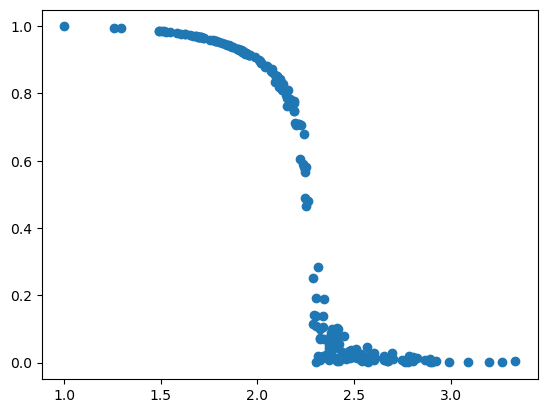

In [30]:
plt.plot(T,abs(EM["M_mean"]),"o")
#print(EM)

In [70]:
data = run({"t_step":0.01, "flip_perc":0.1, "N":100, "t_min":1.2, "t_max":3.2, "n_burnin":25000, "n_steps":50000, "use_gaussian":False})


2D Ising Model Simulation; multi-cores

Starting temp 1.22
Starting temp 1.23
Starting temp 1.2
Starting temp 1.21
Starting temp 1.25
Starting temp 1.24
Starting temp 1.26
Finished Temp 1.23
Starting temp 1.27
Finished Temp 1.22
Starting temp 1.28
Finished Temp 1.21
Starting temp 1.29
Finished Temp 1.24
Starting temp 1.3
Finished Temp 1.26
Starting temp 1.31
Finished Temp 1.2
Starting temp 1.32
Finished Temp 1.25
Starting temp 1.33
Finished Temp 1.29
Starting temp 1.34
Finished Temp 1.3
Starting temp 1.35
Finished Temp 1.28
Starting temp 1.36
Finished Temp 1.27
Starting temp 1.37
Finished Temp 1.32
Starting temp 1.38
Finished Temp 1.31
Starting temp 1.39
Finished Temp 1.33
Starting temp 1.4
Finished Temp 1.36
Starting temp 1.41
Finished Temp 1.38
Starting temp 1.42
Finished Temp 1.35
Starting temp 1.43
Finished Temp 1.37
Finished Temp 1.39
Starting temp 1.44
Starting temp 1.45
Finished Temp 1.4
Starting temp 1.46
Finished Temp 1.34
Starting temp 1.47
Finished Temp 1.41
Starting temp 1

Process SpawnPoolWorker-104:
Process SpawnPoolWorker-107:
Process SpawnPoolWorker-108:
Process SpawnPoolWorker-103:
Process SpawnPoolWorker-106:
Process SpawnPoolWorker-105:
Process SpawnPoolWorker-101:
Traceback (most recent call last):
  File "/Users/gfitez/anaconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/Users/gfitez/anaconda3/lib/python3.10/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/gfitez/anaconda3/lib/python3.10/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/gfitez/anaconda3/lib/python3.10/multiprocessing/queues.py", line 364, in get
    with self._rlock:
  File "/Users/gfitez/anaconda3/lib/python3.10/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
Traceback (most recent call last):
  File "/Users/gfitez/anaconda3/lib/python3.10/multiprocessing/process.py", line 314, in _bo

KeyboardInterrupt: 

[2.24910836 0.11197577 1.13428439]


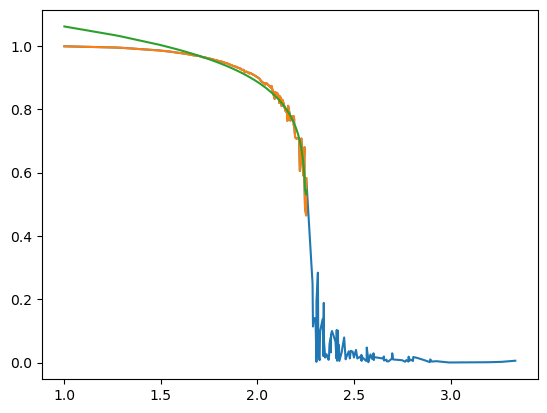

In [69]:
M=abs(EM["M_mean"])
plt.plot(T,M)

cutI=peakI+10
leftM = M[0:cutI+1]
leftT = T[0:cutI+1]

def dwindle(x,Tc,a,b):
    return b*np.abs((x-Tc)/Tc)**a

plt.plot(leftT,leftM)

popt, pcov = curve_fit(dwindle,leftT,leftM,(2.26,1/8,1))
plt.plot(leftT,dwindle(leftT,*popt))
print(popt)